In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors, cm
import seaborn as sns
#import
from collections import Counter

%matplotlib inline

In [2]:
data = pd.read_csv('C:/Users/TRANTUANVU/Google Drive/Data Science book/Data science course/Course 9/week 5/AB_NYC_2019.csv')
print(data.shape)
data.head()

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [18]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [20]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [21]:
data.apply(lambda x: sum(x.isnull()))

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [22]:
def count_values(df):
   for x in df.columns:
      value = df[x].value_counts()
      print('Value count of ' + x + ': \n', value)
      print('\n')

columns = [x for x in data.columns if x not in ['id', 'host_id', 'name', 'host_name']]
count_values(data[columns])

Value count of neighbourhood_group: 
 Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


Value count of neighbourhood: 
 Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Willowbrook              1
Fort Wadsworth           1
Richmondtown             1
Rossville                1
Woodrow                  1
Name: neighbourhood, Length: 221, dtype: int64


Value count of latitude: 
 40.71813    18
40.68634    13
40.69414    13
40.68444    13
40.71171    12
            ..
40.79266     1
40.60531     1
40.81878     1
40.59621     1
40.62066     1
Name: latitude, Length: 19048, dtype: int64


Value count of longitude: 
 -73.95677    18
-73.95427    18
-73.95405    17
-73.95136    16
-73.94791    16
             ..
-73.85485     1
-73.72582     1
-73.91712     1
-74.02634     1
-

In [0]:
attribute_ignored = ['id', 'name', 'host_name']
categorical_variables = [x for x in data.dtypes.index if data.dtypes[x] == 'object' and x not in attribute_ignored ] + ['host_id']
continuous_varicables = [x for x in data.dtypes.index if x not in categorical_variables + attribute_ignored]

In [24]:
 continuous_varicables = [x for x in data.dtypes.index if x not in categorical_variables + attribute_ignored]
 [categorical_variables + attribute_ignored]
 continuous_varicables

['latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [25]:
# frequences of categorical variables:
for col in categorical_variables:
   print('\n Frequency of categorical variables %s' %col)
   print(data[col].value_counts(normalize = True))


 Frequency of categorical variables neighbourhood_group
Manhattan        0.443011
Brooklyn         0.411167
Queens           0.115881
Bronx            0.022313
Staten Island    0.007629
Name: neighbourhood_group, dtype: float64

 Frequency of categorical variables neighbourhood
Williamsburg          0.080172
Bedford-Stuyvesant    0.075959
Harlem                0.054361
Bushwick              0.050414
Upper West Side       0.040311
                        ...   
Willowbrook           0.000020
Fort Wadsworth        0.000020
Richmondtown          0.000020
Rossville             0.000020
Woodrow               0.000020
Name: neighbourhood, Length: 221, dtype: float64

 Frequency of categorical variables room_type
Entire home/apt    0.519665
Private room       0.456611
Shared room        0.023724
Name: room_type, dtype: float64

 Frequency of categorical variables last_review
2019-06-23    0.036377
2019-07-01    0.034987
2019-06-30    0.034524
2019-06-24    0.022527
2019-07-07    0.018485
   

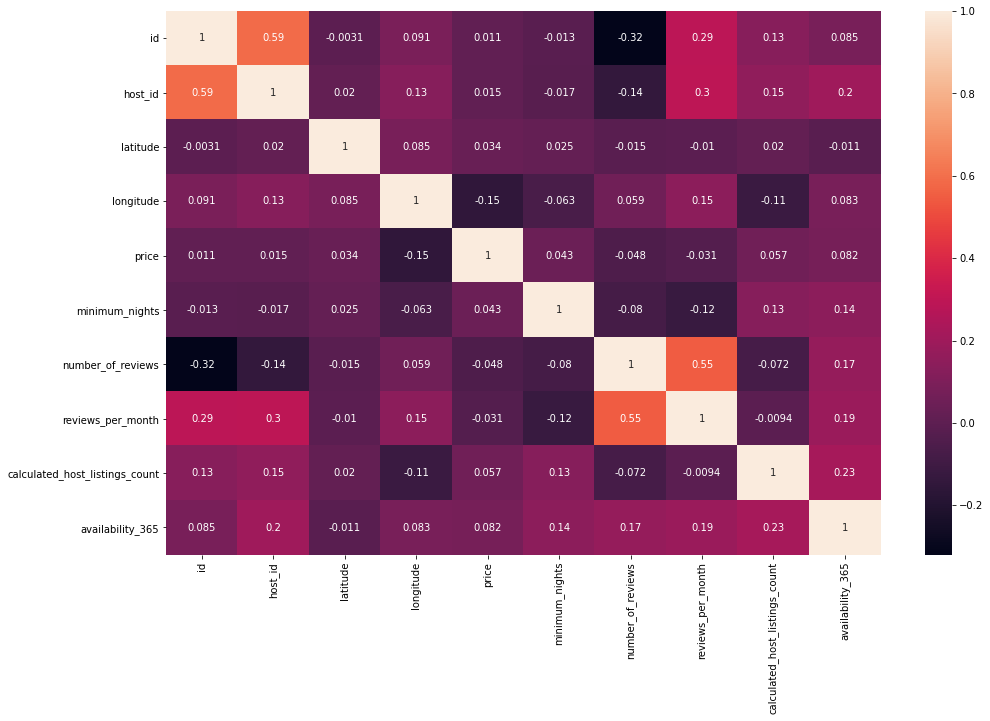

In [26]:
# correlation matrix
corr = data.corr(method='pearson')
plt.figure(figsize=(16,10))
sns.heatmap(data=corr, annot=True)

##**scatter plot with all continuous variables**

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

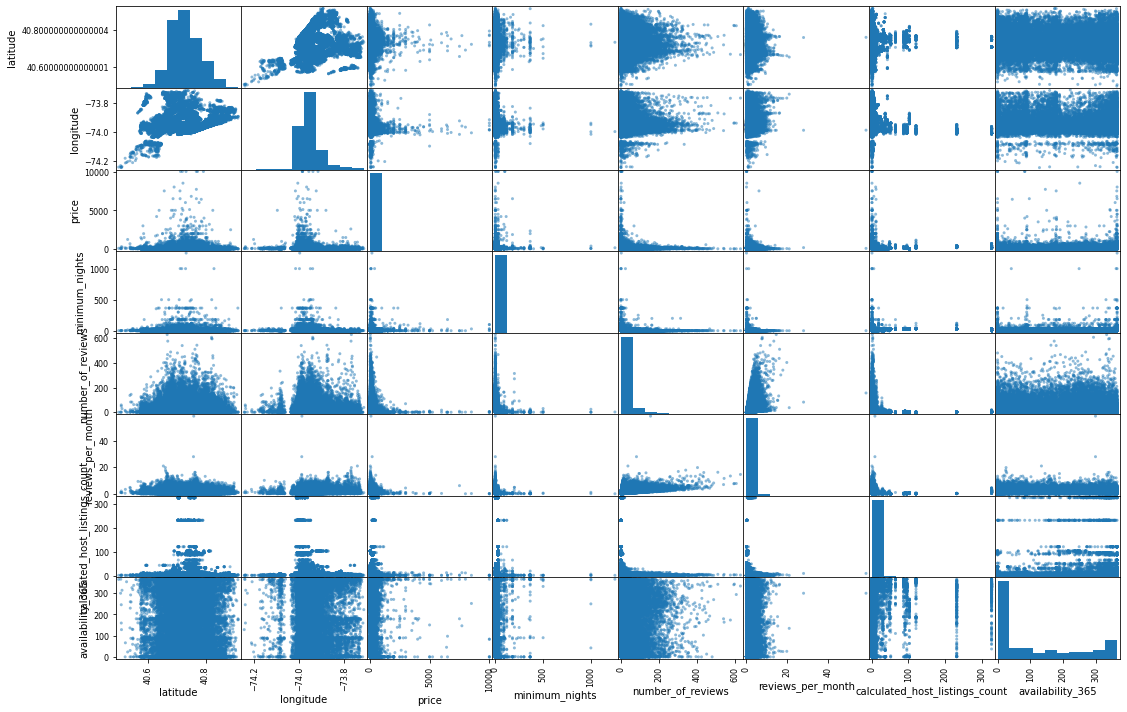

In [52]:
from pandas.plotting import scatter_matrix

scatter_matrix(data[continuous_varicables], figsize=(18,12))
plt.show()

#visualization total price with categorical variables

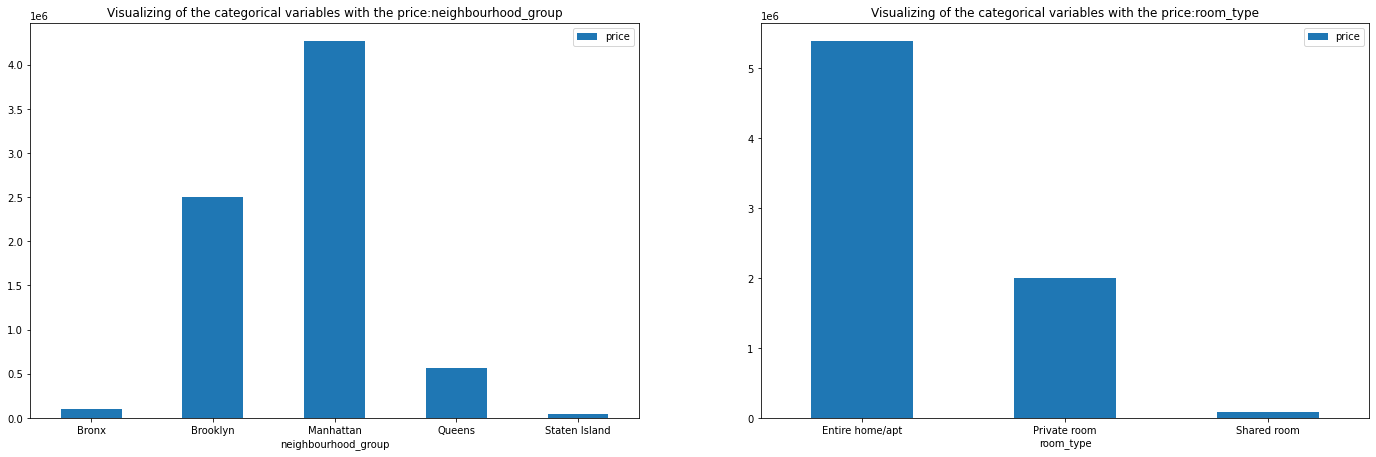

In [28]:
#price group with neighbourhood_group, neighbourhood

target = 'price'
fig = plt.figure(figsize=(24,16))

columns = ['neighbourhood_group', 'room_type']

for i, val in enumerate(columns):
    ax = fig.add_subplot(len(columns), 2, i + 1)
    #print('Visualizing of the categorical variables with the price: %s'%val)
    temp = data.groupby([val])[target].sum()
    #print((temp.index))
    #temp.plot(kind = 'bar', ax = ax, rot = 90)
    title = 'Visualizing of the categorical variables with the price:' + val
    temp.plot.bar(x=temp.index, y=temp[0], ax = ax, rot = 0, title = title, legend = True)  


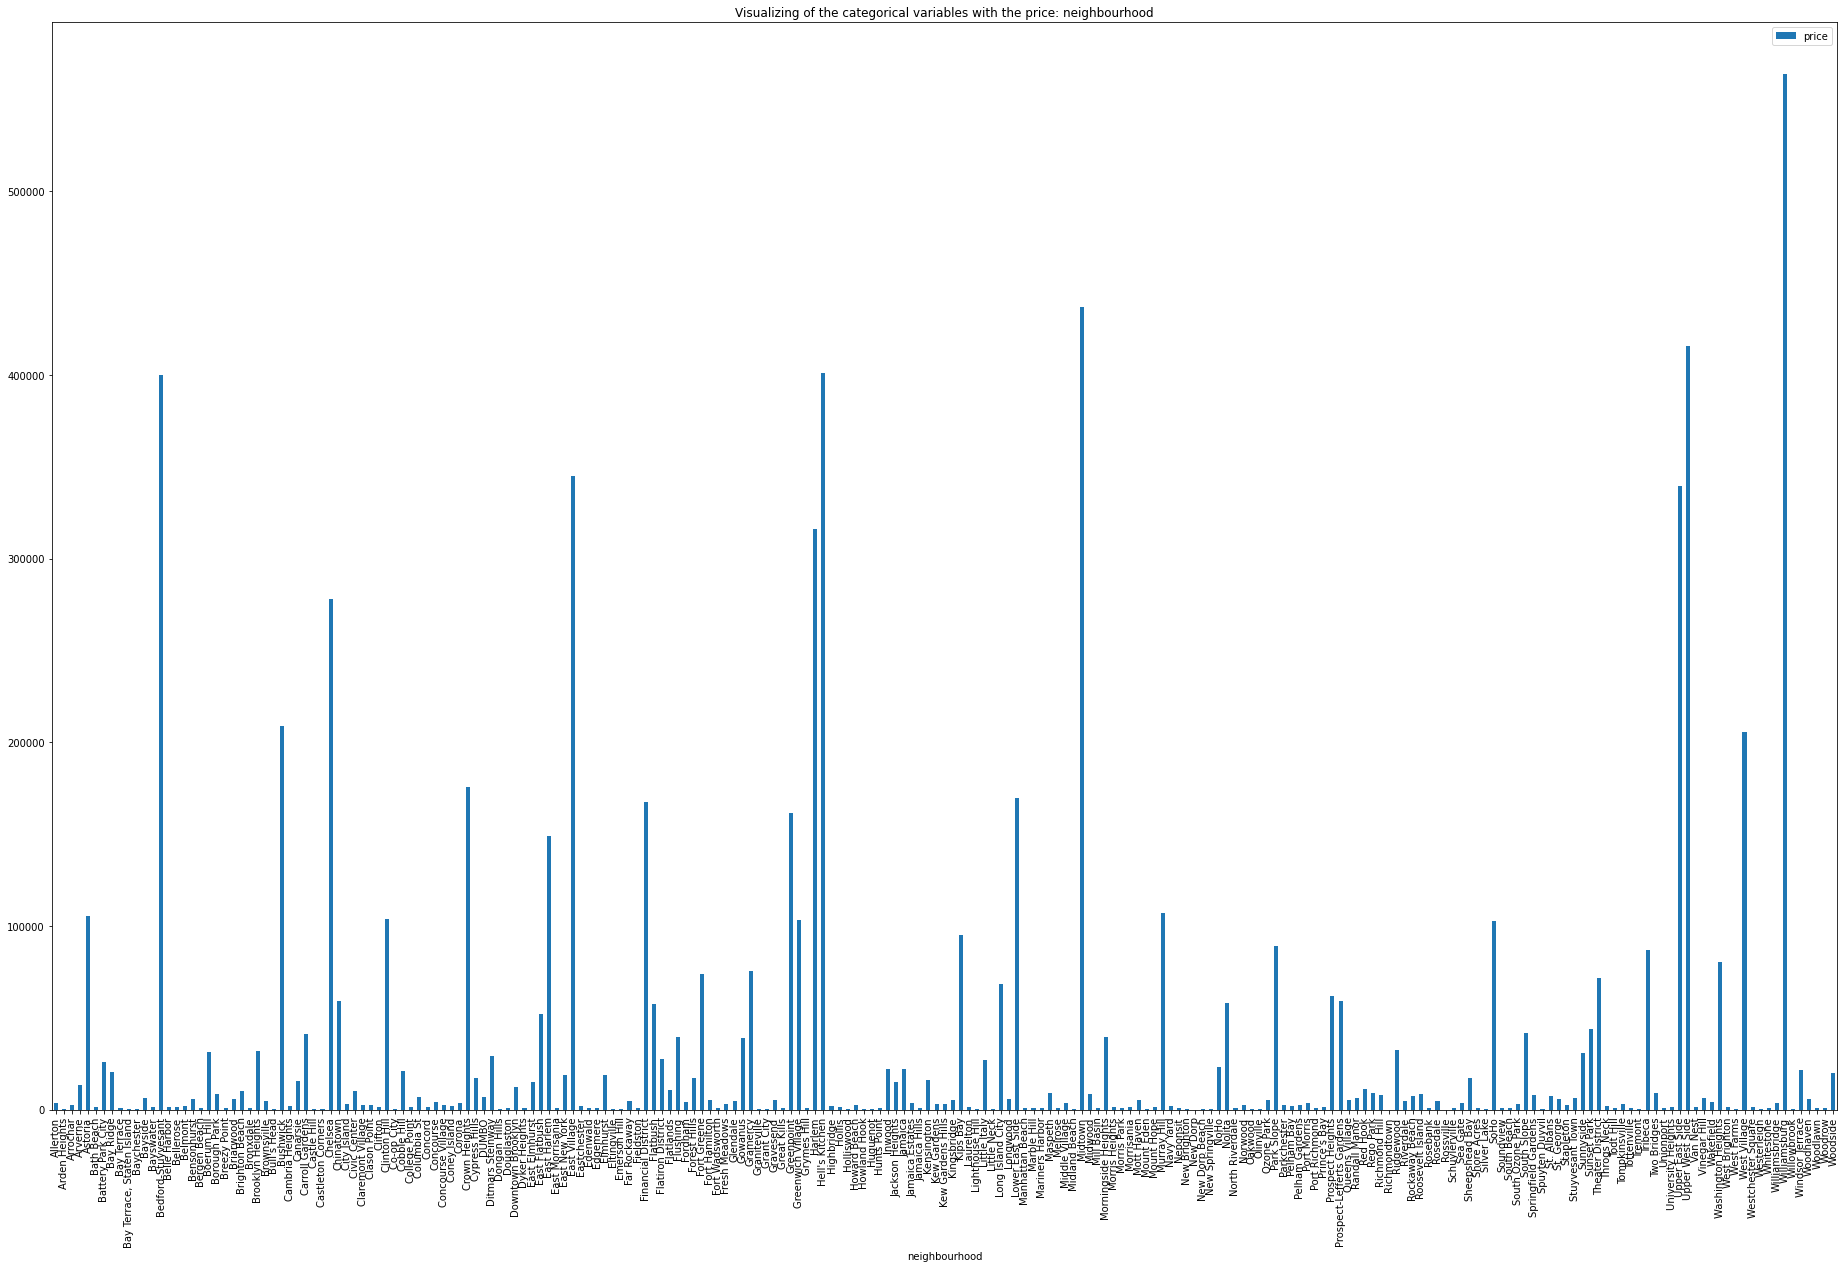

In [29]:
fig_n = plt.figure(figsize=(32,20))
ax_n = fig_n.add_subplot(1,1,1)
title = 'Visualizing of the categorical variables with the price: neighbourhood'
temp = data.groupby(['neighbourhood'])['price'].sum()
temp.plot(kind='bar', ax = ax_n, title = title, legend = True)

##Plot neighbourhood group

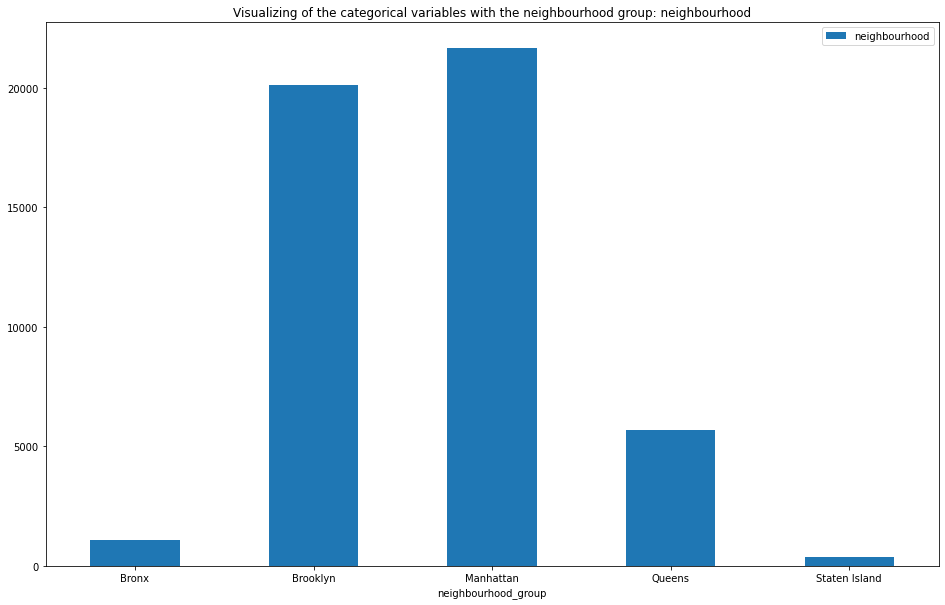

In [53]:
neigbourhood_gr = data.groupby('neighbourhood_group')['neighbourhood'].count()
fig_ng = plt.figure(figsize=(16,10))
ax_ng = fig_ng.add_subplot(1,1,1)
title = 'Visualizing of the categorical variables with the neighbourhood group: neighbourhood'
legend = data['neighbourhood_group'].unique()
neigbourhood_gr.plot(kind='bar', ax = ax_ng, title = title, legend = True, rot = 0)


## plot room_type group with neighbourhood

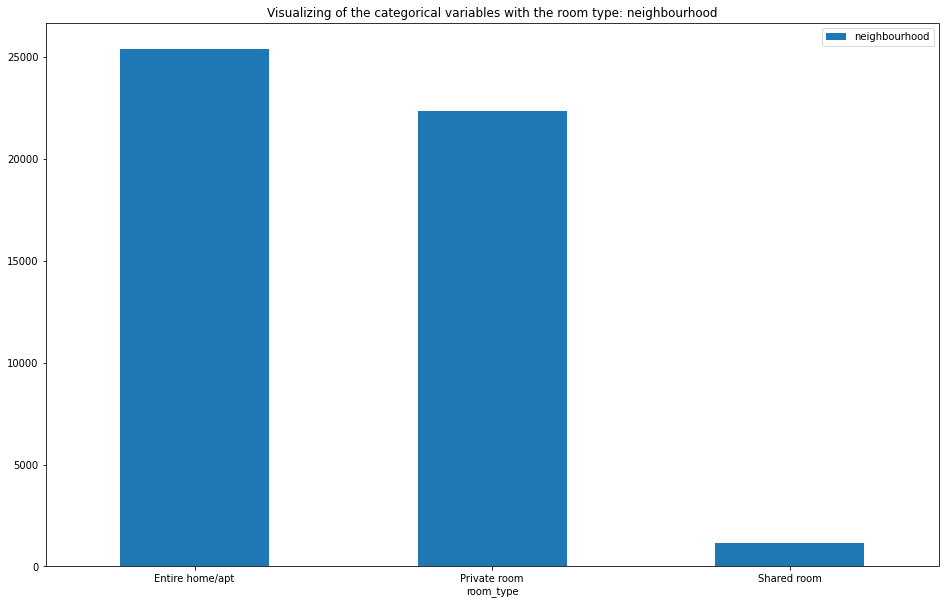

In [54]:
neigbourhood_gr = data.groupby('room_type')['neighbourhood'].count()
fig_ng = plt.figure(figsize=(16,10))
ax_ng = fig_ng.add_subplot(1,1,1)
title = 'Visualizing of the categorical variables with the room type: neighbourhood'
legend = data['neighbourhood_group'].unique()
neigbourhood_gr.plot(kind='bar', ax = ax_ng, title = title, legend = True, rot = 0)


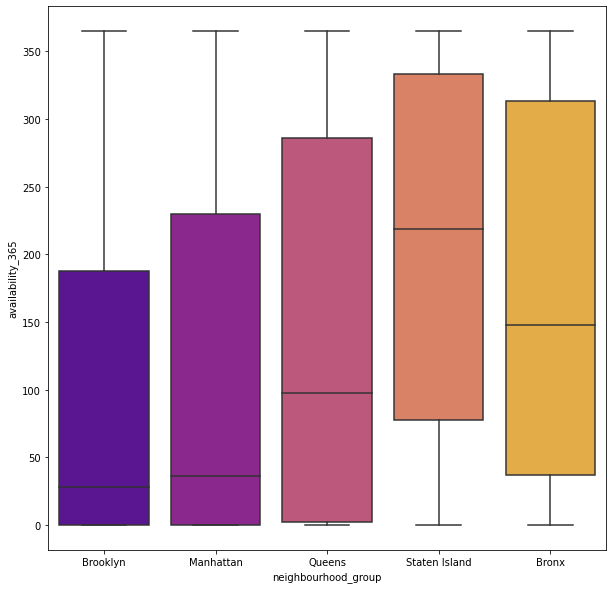

In [32]:
# visualizing bar plot between neighbourhood_group and availablity of room
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=data, x='neighbourhood_group',y='availability_365', palette='plasma')

## Map of Neighbourhood group

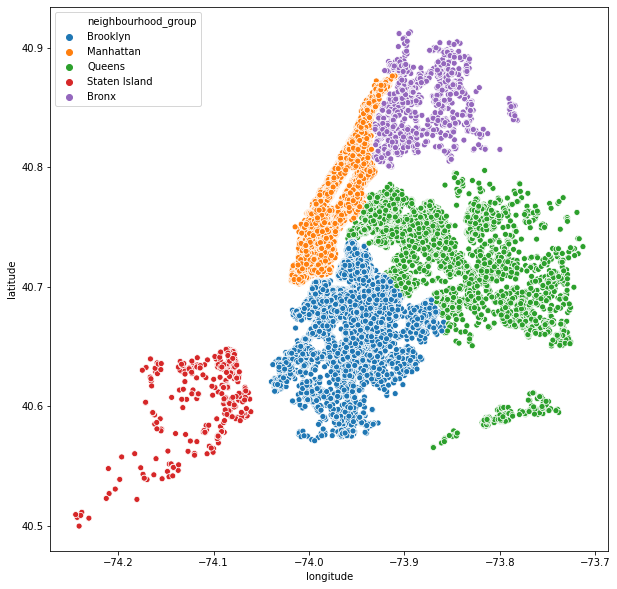

In [33]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude',y='latitude', hue='neighbourhood_group', data=data)

## Map of Neighbourhood

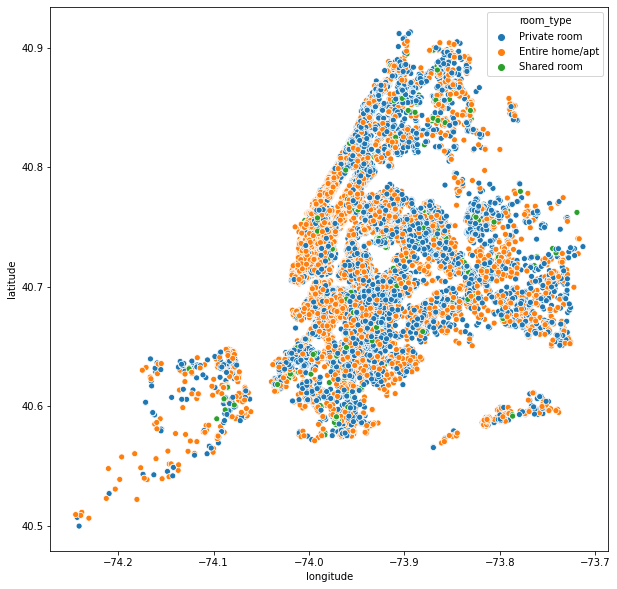

In [34]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='room_type', data = data)

## Availablility of Room

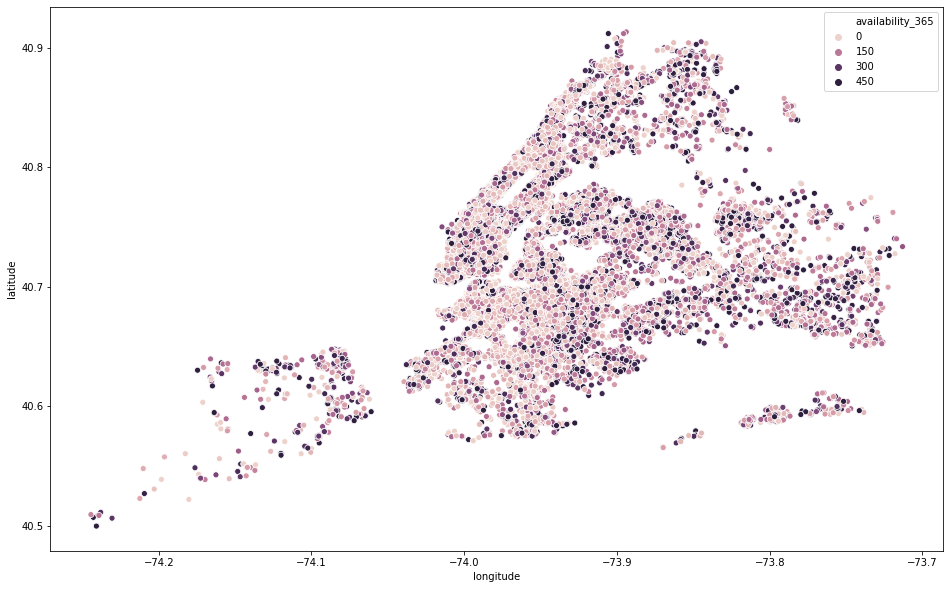

In [35]:
plt.figure(figsize=(16,10))
sns.scatterplot(x='longitude', y='latitude', hue='availability_365', data = data)


In [0]:
_name = []
for name in data.name:
   _name.append(name)
  
def split_name(name):
  split = str(name).split()
  return split

_names_for_count = []
for x in _name:
  for word in split_name(x):
    word=word.lower()
    _names_for_count.append(word)
    

In [0]:
_top_25_word = Counter(_names_for_count).most_common()
_top_25_word[0:25]

sub_w = pd.DataFrame(_top_25_word)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)


[Text(0, 0, 'in'),
 Text(0, 0, 'room'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'private'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'the'),
 Text(0, 0, 'to'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'brooklyn'),
 Text(0, 0, 'apt'),
 Text(0, 0, 'spacious'),
 Text(0, 0, '1'),
 Text(0, 0, 'with'),
 Text(0, 0, '2'),
 Text(0, 0, 'of'),
 Text(0, 0, 'east'),
 Text(0, 0, 'and'),
 Text(0, 0, 'manhattan'),
 Text(0, 0, '&'),
 Text(0, 0, 'park'),
 Text(0, 0, 'sunny'),
 Text(0, 0, 'beautiful'),
 Text(0, 0, 'near'),
 Text(0, 0, 'williamsburg'),
 Text(0, 0, '-'),
 Text(0, 0, 'village'),
 Text(0, 0, 'heart'),
 Text(0, 0, 'a'),
 Text(0, 0, 'large'),
 Text(0, 0, 'loft'),
 Text(0, 0, 'nyc'),
 Text(0, 0, 'central'),
 Text(0, 0, 'from'),
 Text(0, 0, 'modern'),
 Text(0, 0, 'home'),
 Text(0, 0, 'luxury'),
 Text(0, 0, 'west'),
 Text(0, 0, '1br'),
 Text(0, 0, 'new')]

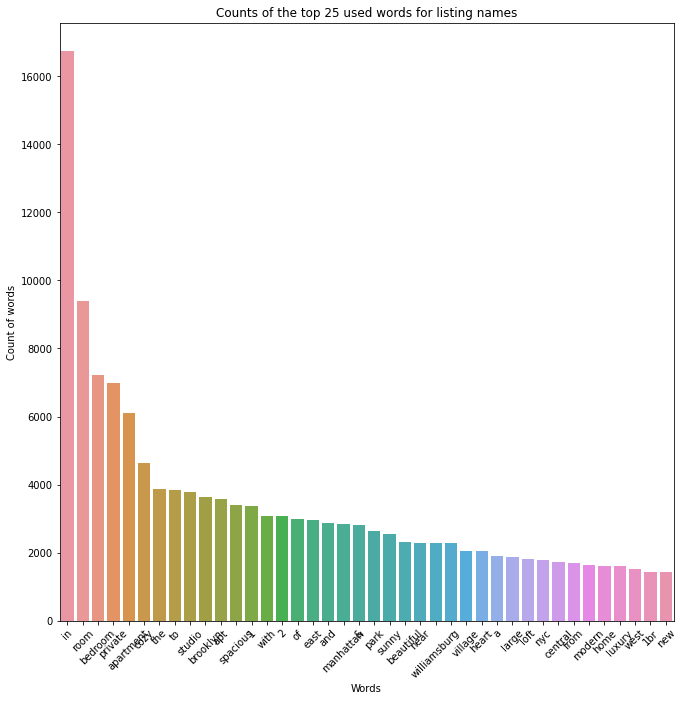

In [58]:
# visualiztion
plt.figure(figsize=(11,11))
ax_word = sns.barplot(x='Words', y='Count', data=sub_w[0:40])
ax_word.set_title('Counts of the top 25 used words for listing names')
ax_word.set_ylabel('Count of words')
ax_word.set_xlabel('Words')
ax_word.set_xticklabels(ax_word.get_xticklabels(), rotation = 45)

## Data Preparation:

In [39]:
# Handling missing values
data.apply(lambda x: sum(x.isnull()))

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [41]:
#last review, reviews_per_month, number of review is releted each others
# feature selection
#columns_selection =  [x for x in data.columns if x not in ['name','host_name', 'last_review','neighbourhood','id','host_id','longitude','latitude']]
columns_selection =  [x for x in data.columns if x not in ['name','host_name', 'last_review','neighbourhood','id','host_id']]
data_selection = data[columns_selection]
columns_selection


['neighbourhood_group',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [42]:
#remove row which has name (host_name) attribute that is null

#get index of row in dataframe to remove 
#index_remove = data[(data['name'].isnull()) | (data['host_name'].isnull())].index
#data.drop(index_remove, inplace=True)
#data.shape
#data_selection.astype({'number_of_reviews':'float'})
data_selection['reviews_per_month'].fillna(0, inplace=True)
data_selection['number_of_reviews'].fillna(0, inplace=True)

data_selection.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


(48895, 10)

In [43]:
#check missing values
data_selection.apply(lambda x: sum(x.isnull()))

neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### One-Hot Encoding

In [44]:
#get dummies variablesL
data_selection = pd.get_dummies(data_selection, columns=['neighbourhood_group','room_type'])
data_selection.dtypes

latitude                             float64
longitude                            float64
price                                  int64
minimum_nights                         int64
number_of_reviews                      int64
reviews_per_month                    float64
calculated_host_listings_count         int64
availability_365                       int64
neighbourhood_group_Bronx              uint8
neighbourhood_group_Brooklyn           uint8
neighbourhood_group_Manhattan          uint8
neighbourhood_group_Queens             uint8
neighbourhood_group_Staten Island      uint8
room_type_Entire home/apt              uint8
room_type_Private room                 uint8
room_type_Shared room                  uint8
dtype: object

## Model Building

In [0]:
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import r2_score
import statsmodels.api as sm


def model_fit(alg, dtrain, dtest, predictors, target):
    # fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])

    #predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #perform cross validation
    cv_score = model_selection.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=5, scoring = 'neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    r2_score = alg.score(dtrain[predictors], dtrain[target])
    n_samples = dtrain.shape[0]
    k_parameters = dtrain.shape[1] - 1
     #print model report
    print('\nModel report')
    print('RMSE: %.4g' % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    
    print('CV score: Mean - %.4g | Std - %.4g| Min - %.4g |Max - %.4g' % (np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score)))
    print('R-Squared: %.4g' % r2_score)
    adjust_r2 = (1 - (((n_samples - 1)*(1 - r2_score))/(n_samples - k_parameters)))
    print('Adjusted R-Squared: %.4g' % adjust_r2 )
    
    #predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])


In [0]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_selection, test_size = 0.25, random_state = 0) 
target = 'price'
predictors = [x for x in data_selection.columns if x not in [target]]

#### Linear regression model


Model report
RMSE: 231.8
CV score: Mean - 230.3 | Std - 26.92| Min - 187.4 |Max - 258.3
R-Squared: 0.09344
Adjusted R-Squared: 0.0931


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


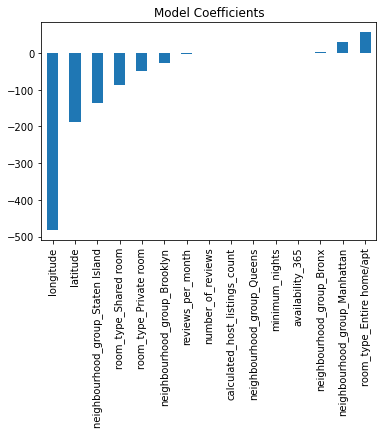

In [47]:
linear_reg = LinearRegression(normalize=True)
model_fit(linear_reg, train, test, predictors ,target)
coef_linear = pd.Series(linear_reg.coef_, predictors).sort_values()
coef_linear.plot(kind = 'bar', title = 'Model Coefficients')

### Rigde regression


Model report
RMSE: 231.8
CV score: Mean - 230.3 | Std - 26.92| Min - 187.4 |Max - 258.3
R-Squared: 0.09329
Adjusted R-Squared: 0.09295


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


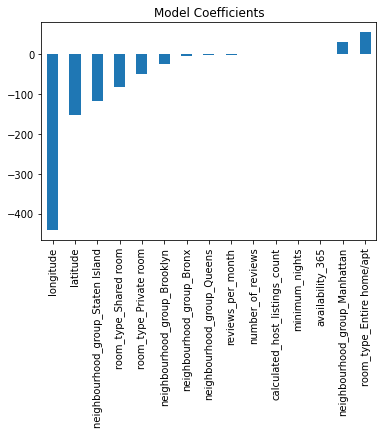

In [48]:
ridge_reg = Ridge(alpha=0.05, normalize=True)

model_fit(ridge_reg, train, test, predictors, target)

coef_ridge = pd.Series(ridge_reg.coef_, predictors).sort_values()
coef_ridge.plot(kind='bar', title='Model Coefficients')


Model report
RMSE: 223.6
CV score: Mean - 227.2 | Std - 28.28| Min - 182 |Max - 255.9
R-Squared: 0.1569
Adjusted R-Squared: 0.1566


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


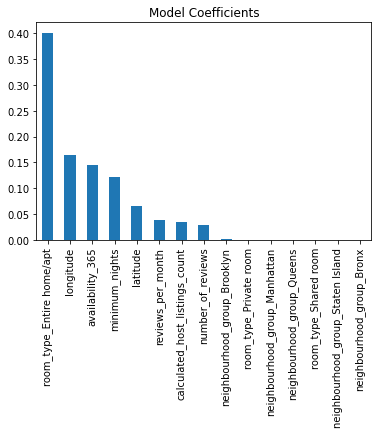

In [49]:
decision_tree = DecisionTreeRegressor(max_depth=12, min_samples_leaf=100)

model_fit(decision_tree, train, test, predictors, target)

coef_decision_tree = pd.Series(decision_tree.feature_importances_, predictors).sort_values(ascending=False)
coef_decision_tree.plot(kind='bar', title='Model Coefficients')


Model report
RMSE: 226.6
CV score: Mean - 226.8 | Std - 27.88| Min - 182.7 |Max - 255.7
R-Squared: 0.1337
Adjusted R-Squared: 0.1334


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


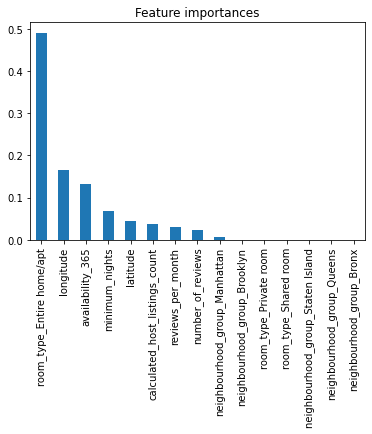

In [50]:
from sklearn.ensemble import RandomForestRegressor

random_reg = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_leaf=100,n_jobs=4)
model_fit(random_reg, train, test, predictors, target)
cofe_random_reg = pd.Series(random_reg.feature_importances_, predictors).sort_values(ascending=False)
cofe_random_reg.plot(kind='bar', title='Feature importances')